In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager as fm
import seaborn as sns
import datetime as dt
import matplotlib.font_manager as fm

from matplotlib import gridspec

In [3]:
font_list = fm.findSystemFonts(fontpaths = None, fontext = 'ttf')
font_list[:]

['C:\\WINDOWS\\Fonts\\segoeuil.ttf',
 'C:\\Windows\\Fonts\\calibri.ttf',
 'C:\\Windows\\Fonts\\SitkaB.ttc',
 'C:\\Windows\\Fonts\\segoeprb.ttf',
 'C:\\WINDOWS\\Fonts\\seguibli.ttf',
 'C:\\Windows\\Fonts\\times.ttf',
 'C:\\Windows\\Fonts\\seguibl.ttf',
 'C:\\WINDOWS\\Fonts\\seguiemj.ttf',
 'C:\\WINDOWS\\Fonts\\taile.ttf',
 'C:\\Windows\\Fonts\\calibrili.ttf',
 'C:\\Windows\\Fonts\\gadugi.ttf',
 'C:\\WINDOWS\\Fonts\\consolaz.ttf',
 'C:\\Windows\\Fonts\\impact.ttf',
 'C:\\Windows\\Fonts\\LeelUIsl.ttf',
 'C:\\Windows\\Fonts\\segoeuisl.ttf',
 'C:\\Windows\\Fonts\\consolai.ttf',
 'C:\\WINDOWS\\Fonts\\seguibl.ttf',
 'C:\\WINDOWS\\Fonts\\seguisb.ttf',
 'C:\\WINDOWS\\Fonts\\trebucbi.ttf',
 'C:\\Windows\\Fonts\\segoesc.ttf',
 'C:\\WINDOWS\\Fonts\\Candarab.ttf',
 'C:\\WINDOWS\\Fonts\\constan.ttf',
 'C:\\WINDOWS\\Fonts\\Sitka.ttc',
 'C:\\Windows\\Fonts\\calibriz.ttf',
 'C:\\Windows\\Fonts\\trebucit.ttf',
 'C:\\WINDOWS\\Fonts\\calibrii.ttf',
 'C:\\Windows\\Fonts\\gadugib.ttf',
 'C:\\Windows\\Fonts\

In [4]:
fm.get_fontconfig_fonts()
font_location = 'C:\\WINDOWS\\Fonts\\malgun.ttf' # For Windows
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\2582751676.py:1: MatplotlibDeprecationWarning: 
The get_fontconfig_fonts function was deprecated in Matplotlib 3.5 and will be removed two minor releases later.
  fm.get_fontconfig_fonts()


In [5]:
# BASE_DIR = Path(__name__).resolve().parent.parent
FILES_DIR = '../files/'
# bidding_df = pd.read_csv(FILES_DIR + 'bidding_results.csv')
log_df = pd.read_csv(FILES_DIR + 'log_csv.csv')

In [6]:
log = log_df.copy()

In [7]:
# column describe 
def descriptive_info(log):
    number_of_cells = log.count(axis=0, level=None, numeric_only=False)
    print('Total number of cells the datafile has: \n' + str(number_of_cells))
    print('\n')
    print('Printing descriptive statistics...\n\n', log.describe())

descriptive_info(log)

Total number of cells the datafile has: 
Unnamed: 0         5659541
uid                5473228
action_type        5659541
category1          5659541
category2          5659541
category3          4879535
collect_time       5659541
geoip_city_name    5242509
useragent_os       5659541
viewrate           5657112
viewtime           5659541
dtype: int64


Printing descriptive statistics...

          Unnamed: 0      viewrate      viewtime
count  5.659541e+06  5.657112e+06  5.659541e+06
mean   2.829770e+06  7.677686e+01  5.126022e+04
std    1.633769e+06  4.221447e+01  5.810345e+05
min    0.000000e+00  0.000000e+00  0.000000e+00
25%    1.414885e+06  1.000000e+02  8.940000e+02
50%    2.829770e+06  1.000000e+02  1.010400e+04
75%    4.244655e+06  1.000000e+02  4.800500e+04
max    5.659540e+06  1.000000e+02  8.636989e+07


In [8]:
# null값 퍼센트로 보기
(log.isnull().sum()/ log.shape[0]).sort_values(ascending=False)

category3          0.137821
geoip_city_name    0.073687
uid                0.032920
viewrate           0.000429
Unnamed: 0         0.000000
action_type        0.000000
category1          0.000000
category2          0.000000
collect_time       0.000000
useragent_os       0.000000
viewtime           0.000000
dtype: float64

In [9]:
# 서울과 경기도는 시, 구와 중복 데이터이기 때문에 drop한다
log_null_ts = log.copy()
drop_city = log_null_ts[log_null_ts['geoip_city_name'] != 'Seoul']
drop_city = drop_city[drop_city['geoip_city_name'] != 'Gyeonggi-do']

drop_city.isnull().sum().sort_values(ascending=False)

category3          643126
geoip_city_name    417032
uid                132162
viewrate             1722
Unnamed: 0              0
action_type             0
category1               0
category2               0
collect_time            0
useragent_os            0
viewtime                0
dtype: int64

In [10]:
# null값들을 un_** 으로 채워서 확인해보기
log_drop_null = drop_city
log_drop_null['geoip_city_name'].fillna('un_city_name', inplace = True)
log_drop_null['category3'].fillna('un_category', inplace = True)
log_drop_null['uid'].fillna('un_name', inplace = True)
log_drop_null.dropna(axis = 0, inplace = True)
print(log_drop_null.isnull().sum().sort_values(ascending=False)) # null값 퍼센트로 표현

Unnamed: 0         0
uid                0
action_type        0
category1          0
category2          0
category3          0
collect_time       0
geoip_city_name    0
useragent_os       0
viewrate           0
viewtime           0
dtype: int64


In [11]:
log_drop_null

,Unnamed: 0,uid,action_type,category1,category2,category3,collect_time,geoip_city_name,useragent_os,viewrate,viewtime
0,0,avpKyWMn/xEADNlb,View,주방용품,그릇·홈세트,식판·나눔접시,2022-12-29 17:29:02,Seongnam-si,Windows,100.0,80033
1,1,0+5vEmGkOuAAB5j2,Basket,패브릭,매트,주방·다용도매트,2022-12-29 12:56:38,Yongin-si,Windows,0.0,0
3,3,dC9Fl2Ly9lcADrTn,Highlight,데코·식물,플라워·식물,화병·화분,2022-12-29 17:54:30,Gwangmyeong-si,Windows,0.0,0
4,4,09gKcGLg0I8ACyQy,View,가구,진열장·책장,책장,2022-12-29 18:45:05,Jongno-gu,Mac OS X,100.0,1238
5,5,091fXGIDYFEABcpA,Basket,수납·정리,화장대·테이블정리,티슈커버·케이스,2022-12-29 17:53:11,Incheon,Windows,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
5659533,5659533,3yfy5mOZpbYAAMpw,View,가전·디지털,주방가전,오븐·전자레인지,2022-12-29 12:45:14,Gangnam-gu,Android,100.0,6054
5659534,5659534,qE73wWOr1C8ABhBw,View,캠핑용품,캠핑생활용품,기타캠핑생활용품,2022-12-28 15:40:29,Songpa-gu,Windows,100.0,10006
5659537,5659537,PVMstmNg4I4ADq9R,Basket,가구,진열장·책장,책장,2022-12-28 14:30:09,Jinju,Windows,0.0,0
5659538,5659538,diRXdmN49dUABrVo,View,가구,테이블·식탁·책상,식탁,2022-12-29 12:45:13,Gunpo,Android,100.0,47217


In [10]:
log_uid = log_drop_null.drop_duplicates(['uid'])

In [15]:
log_uid['action_type'].value_counts(normalize=True)

View         0.956705
Highlight    0.024983
Basket       0.009111
SINF         0.005155
Copy         0.004045
Name: action_type, dtype: float64

In [16]:
basket = log_uid[log_uid['action_type'] == 'Basket']
basket

,Unnamed: 0,uid,action_type,category1,category2,category3,collect_time,geoip_city_name,useragent_os,viewrate,viewtime
1,1,0+5vEmGkOuAAB5j2,Basket,패브릭,매트,주방·다용도매트,2022-12-29 12:56:38,Yongin-si,Windows,0.0,0
5,5,091fXGIDYFEABcpA,Basket,수납·정리,화장대·테이블정리,티슈커버·케이스,2022-12-29 17:53:11,Incheon,Windows,0.0,0
32,32,tqzAY2DMOxsADYls,Basket,패브릭,러그·카페트,극세사·단모러그,2022-12-29 11:00:45,Mapo-gu,Windows,0.0,0
87,87,Dj8PAV/W7asADnq1,Basket,가구,소파,일반소파,2022-12-29 11:48:43,Gangnam-gu,Windows,0.0,0
129,129,eZVNKmBQMGcAAZPC,Basket,가구,행거·옷장,행거,2022-12-29 18:01:46,Mokpo,Windows,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
5493365,5493365,OxkaemJ68W8ACbVb,Basket,패브릭,주방패브릭,식탁보·러너,2022-12-28 08:48:10,Daejeon,Windows,0.0,0
5512171,5512171,3E7pnmOrzUcACSwG,Basket,가구,서랍·수납장,협탁,2022-12-28 14:05:06,Anyang-si,Windows,0.0,0
5528102,5528102,2pghaWMNdZUAAcDV,Basket,주방용품,냄비·프라이팬·솥,냄비·프라이팬세트,2022-12-30 11:02:22,Jongno-gu,Windows,0.0,0
5577173,5577173,0l8QIWOuSFsACXC9,Basket,데코·식물,DIY·취미·공예,DIY뜨개질,2022-12-30 11:21:36,un_city_name,Windows,0.0,0


In [17]:
non_basket = log_uid[log_uid['action_type'] != 'Basket']
non_basket

,Unnamed: 0,uid,action_type,category1,category2,category3,collect_time,geoip_city_name,useragent_os,viewrate,viewtime
0,0,avpKyWMn/xEADNlb,View,주방용품,그릇·홈세트,식판·나눔접시,2022-12-29 17:29:02,Seongnam-si,Windows,100.0,80033
3,3,dC9Fl2Ly9lcADrTn,Highlight,데코·식물,플라워·식물,화병·화분,2022-12-29 17:54:30,Gwangmyeong-si,Windows,0.0,0
4,4,09gKcGLg0I8ACyQy,View,가구,진열장·책장,책장,2022-12-29 18:45:05,Jongno-gu,Mac OS X,100.0,1238
6,6,Adwku2KoPCwAANbw,View,노하우,꾸미기팁,un_category,2022-12-29 09:13:14,Gwanak-gu,Windows,100.0,37161
7,7,tOQhrWGfQcAACo9B,View,가구,테이블·식탁·책상,책상,2022-12-29 15:32:12,Gangnam-gu,Windows,100.0,8483
...,...,...,...,...,...,...,...,...,...,...,...
5659447,5659447,DiETNWGKOwMADDsp,View,가전·디지털,태블릿PC,태블릿PC,2022-12-28 17:18:27,Yongin-si,Windows,100.0,7572
5659459,5659459,amWDVmOr0ycAB/2J,View,가구,테이블·식탁·책상,사이드테이블,2022-12-28 22:12:53,Gangbuk-gu,iOS,100.0,287291
5659462,5659462,DiaRu2I60NgACwX7,View,노하우,건축&주택,un_category,2022-12-29 10:54:12,Seongnam-si,Windows,100.0,228039
5659472,5659472,0/usD2Os6BcACzMc,View,패브릭,매트리스커버,un_category,2022-12-29 10:07:13,Changwon,Windows,100.0,58595


In [19]:
basket['useragent_os'].value_counts(normalize=True)

Windows      0.900390
Mac OS X     0.089107
iOS          0.004405
Linux        0.003558
Android      0.001863
Chrome OS    0.000508
Tizen        0.000169
Name: useragent_os, dtype: float64

In [20]:
non_basket['useragent_os'].value_counts(normalize=True)

Windows      0.390991
Android      0.372818
iOS          0.194841
Mac OS X     0.037060
Linux        0.002477
Other        0.001481
Chrome OS    0.000173
CentOS       0.000073
Ubuntu       0.000048
Tizen        0.000031
Fedora       0.000003
OpenBSD      0.000002
FreeBSD      0.000002
Name: useragent_os, dtype: float64

Windows      0.900390
Mac OS X     0.089107
iOS          0.004405
Linux        0.003558
Android      0.001863
Chrome OS    0.000508
Tizen        0.000169
Name: useragent_os, dtype: float64

Windows      0.390991
Android      0.372818
iOS          0.194841
Mac OS X     0.037060
Linux        0.002477
Other        0.001481
Chrome OS    0.000173
CentOS       0.000073
Ubuntu       0.000048
Tizen        0.000031
Fedora       0.000003
OpenBSD      0.000002
FreeBSD      0.000002
Name: useragent_os, dtype: float64

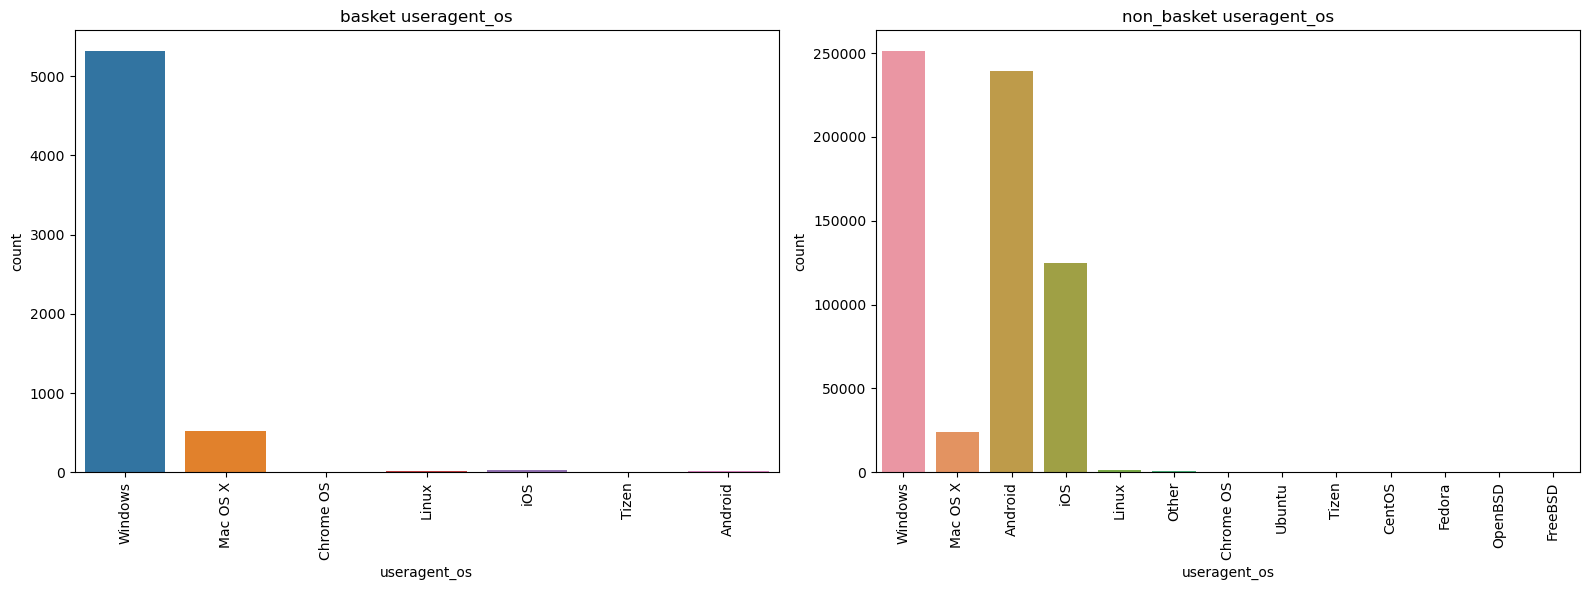

In [41]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
display(basket["useragent_os"].value_counts(normalize=True))
sns.countplot(data=basket, x="useragent_os")
plt.title('basket useragent_os')
plt.xticks(rotation=90)


plt.subplot(1, 2, 2)                
display(non_basket["useragent_os"].value_counts(normalize=True))
sns.countplot(data=non_basket, x="useragent_os")
plt.title('non_basket useragent_os')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [ ]:
useragent_os = set(list(basket['useragent_os'].values))
for os in useragent_os:
    useragent_os_mean = log_view_nonzero.loc[log_view_nonzero['useragent_os'] == os, 'category1'].mean()
    print(os)
    print(useragent_os_mean * 1/10 / 60 / 60)
    print('\n')

## uid별로 분석

In [58]:
log_drop_null

,Unnamed: 0,uid,action_type,category1,category2,category3,collect_time,geoip_city_name,useragent_os,viewrate,viewtime
0,0,avpKyWMn/xEADNlb,View,주방용품,그릇·홈세트,식판·나눔접시,2022-12-29 17:29:02,Seongnam-si,Windows,100.0,80033
1,1,0+5vEmGkOuAAB5j2,Basket,패브릭,매트,주방·다용도매트,2022-12-29 12:56:38,Yongin-si,Windows,0.0,0
3,3,dC9Fl2Ly9lcADrTn,Highlight,데코·식물,플라워·식물,화병·화분,2022-12-29 17:54:30,Gwangmyeong-si,Windows,0.0,0
4,4,09gKcGLg0I8ACyQy,View,가구,진열장·책장,책장,2022-12-29 18:45:05,Jongno-gu,Mac OS X,100.0,1238
5,5,091fXGIDYFEABcpA,Basket,수납·정리,화장대·테이블정리,티슈커버·케이스,2022-12-29 17:53:11,Incheon,Windows,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
5659533,5659533,3yfy5mOZpbYAAMpw,View,가전·디지털,주방가전,오븐·전자레인지,2022-12-29 12:45:14,Gangnam-gu,Android,100.0,6054
5659534,5659534,qE73wWOr1C8ABhBw,View,캠핑용품,캠핑생활용품,기타캠핑생활용품,2022-12-28 15:40:29,Songpa-gu,Windows,100.0,10006
5659537,5659537,PVMstmNg4I4ADq9R,Basket,가구,진열장·책장,책장,2022-12-28 14:30:09,Jinju,Windows,0.0,0
5659538,5659538,diRXdmN49dUABrVo,View,가구,테이블·식탁·책상,식탁,2022-12-29 12:45:13,Gunpo,Android,100.0,47217


In [ ]:
log_drop_null

In [13]:
log_uid = list(set(log_drop_null['uid'].to_list()))

In [14]:
len(log_uid)

647910

In [15]:
log_uid_set = log_drop_null.loc[log_drop_null['action_type'] == 'Basket', 'uid']
log_uid_set =list(set(log_uid_set.to_list()))
len(log_uid_set)

34462

In [19]:
columns = ['uid', 'action_type', 'category1', 'geoip_city_name', 'useragent_os', 'viewrate', 'viewtime']
basket_uid = pd.DataFrame(columns=columns)
for _id in log_uid_set:
    df = log_drop_null.loc[log_drop_null['uid'] == _id]
    basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
basket_uid

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12296\887417180.py:5: FutureWarning: The frame.append method is deprecated and will be

KeyboardInterrupt: 